In [9]:
import xml.sax
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from utils import customTokenize, cleanText, read_glove

In [6]:
def readFiles():
    X, y = [], []

    with open ('../data/articles-training-byarticle.txt', encoding = 'utf-8') as f:
        for line in f:
            tmp = line.split('::')
            text = tmp[1] + ' ' + tmp[2]
            X.append(cleanText(text))

    with open("../data/ground-truth-training-byarticle.xml", encoding="utf-8") as f:
        tree = ET.parse(f)
        root = tree.getroot()
        for article in root.iter('article'):
            y.append(article.attrib['hyperpartisan'])
    return X, y

In [7]:
# read in files and word vectors
texts, labels = readFiles()
y = np.asarray(labels)

In [44]:
# save 50% for tests
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state = 1)
split_idx = list(sss.split(np.zeros(len(y)), y))[0]
train_texts = []
test_texts = []
for i in split_idx[0]:
    train_texts.append(texts[i])
y_train = y[split_idx[0]]
for i in split_idx[1]:
    test_texts.append(texts[i])
y_test = y[split_idx[1]]
    

In [38]:
words_to_use = [100, 200, 300]
glove_dim = [100, 200, 300]
C = [0.01, 0.1, 1, 10, 100]

result_dev = np.zeros((len(glove_dim), len(words_to_use), len(C)))

for id_g, g in enumerate(glove_dim):
    glove = read_glove(g)
    for id_w, num_words in enumerate(words_to_use):
        X = np.zeros( (num_words, g, len(train_texts)) )
        for text_id, text in enumerate(train_texts):
            words = customTokenize(text)
            words = [w for w in words if w in glove.keys()]
            for idx, word in enumerate(words):
                if idx < num_words:
                    X[idx, :, text_id] = glove[word]
        X = np.mean(X, 0).T
        X_train = normalize(X)
        for id_c, c in enumerate(C):
            print('Training for: glove_dim %i; words %i; C %f' %(g,num_words,c))
            model = LogisticRegression(solver = 'lbfgs', C = c)
            result_dev[id_g, id_w, id_c] = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    

Training for: glove_dim 100; words 100; C 0.010000
Training for: glove_dim 100; words 100; C 0.100000
Training for: glove_dim 100; words 100; C 1.000000
Training for: glove_dim 100; words 100; C 10.000000
Training for: glove_dim 100; words 100; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 100; words 200; C 0.010000
Training for: glove_dim 100; words 200; C 0.100000
Training for: glove_dim 100; words 200; C 1.000000
Training for: glove_dim 100; words 200; C 10.000000
Training for: glove_dim 100; words 200; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 100; words 300; C 0.010000
Training for: glove_dim 100; words 300; C 0.100000
Training for: glove_dim 100; words 300; C 1.000000
Training for: glove_dim 100; words 300; C 10.000000
Training for: glove_dim 100; words 300; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 200; words 100; C 0.010000
Training for: glove_dim 200; words 100; C 0.100000
Training for: glove_dim 200; words 100; C 1.000000
Training for: glove_dim 200; words 100; C 10.000000
Training for: glove_dim 200; words 100; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 200; words 200; C 0.010000
Training for: glove_dim 200; words 200; C 0.100000
Training for: glove_dim 200; words 200; C 1.000000
Training for: glove_dim 200; words 200; C 10.000000
Training for: glove_dim 200; words 200; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 200; words 300; C 0.010000
Training for: glove_dim 200; words 300; C 0.100000
Training for: glove_dim 200; words 300; C 1.000000
Training for: glove_dim 200; words 300; C 10.000000
Training for: glove_dim 200; words 300; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 300; words 100; C 0.010000
Training for: glove_dim 300; words 100; C 0.100000
Training for: glove_dim 300; words 100; C 1.000000
Training for: glove_dim 300; words 100; C 10.000000
Training for: glove_dim 300; words 100; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 300; words 200; C 0.010000
Training for: glove_dim 300; words 200; C 0.100000
Training for: glove_dim 300; words 200; C 1.000000
Training for: glove_dim 300; words 200; C 10.000000
Training for: glove_dim 300; words 200; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training for: glove_dim 300; words 300; C 0.010000
Training for: glove_dim 300; words 300; C 0.100000
Training for: glove_dim 300; words 300; C 1.000000
Training for: glove_dim 300; words 300; C 10.000000
Training for: glove_dim 300; words 300; C 100.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


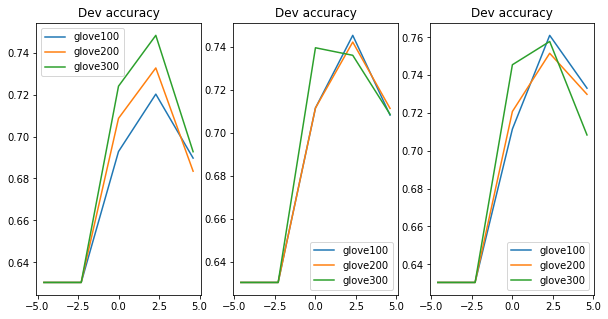

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(131)
for i in range(3):
    plt.plot(np.log(C), result_dev[i, 0,:])
plt.title('Dev accuracy')
plt.legend(['glove100', 'glove200', 'glove300'])

plt.subplot(132)
for i in range(3):
    plt.plot(np.log(C), result_dev[i,1,:])
plt.title('Dev accuracy')
plt.legend(['glove100', 'glove200', 'glove300'])

plt.subplot(133)
for i in range(3):
    plt.plot(np.log(C), result_dev[i,2,:])
plt.title('Dev accuracy')
plt.legend(['glove100', 'glove200', 'glove300'])
    
plt.show()

In [42]:
best_param =  np.unravel_index(np.argmax(result_dev), result_dev.shape)
print('Best for Dev: ', best_param)

Best for Dev:  (0, 2, 3)


In [48]:
result_dev

array([[[0.63042522, 0.63042522, 0.69284274, 0.72021628, 0.68972385],
        [0.63042522, 0.63042522, 0.71160496, 0.74541178, 0.70829668],
        [0.63042522, 0.63042522, 0.71150415, 0.76103678, 0.73311339]],

       [[0.63042522, 0.63042522, 0.70866935, 0.73271628, 0.68346774],
        [0.63042522, 0.63042522, 0.71160496, 0.74228678, 0.71140946],
        [0.63042522, 0.63042522, 0.72078446, 0.75156708, 0.72987537]],

       [[0.63042522, 0.63042522, 0.72401026, 0.74824658, 0.69276026],
        [0.63042522, 0.63042522, 0.73963526, 0.73613148, 0.70866935],
        [0.63042522, 0.63042522, 0.74550037, 0.75781097, 0.70837915]]])

In [45]:
dim = glove_dim[best_param[0]]
num_words = words_to_use[best_param[1]]
glove = read_glove(dim)

X = np.zeros((num_words, dim, len(texts)))
for text_id, text in enumerate(texts):
    words = customTokenize(text)
    words = [w for w in words if w in glove.keys()]
    for idx, word in enumerate(words):
        if idx < num_words:
            X[idx, :, text_id] = glove[word]
X = np.mean(X, 0).T
X_train = normalize(X[split_idx[0]])
X_test = normalize(X[split_idx[1]])

model = LogisticRegression(solver = 'lbfgs', C=C[best_param[2]])
model.fit(X_train, y_train)
tst_pred = model.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, tst_pred))
confusion_matrix(y_test, tst_pred)

Test accuracy:  0.7275541795665634


array([[165,  39],
       [ 49,  70]], dtype=int64)